# Gravitational wave radiation: merger times
---

## Introduction

In this notebook we will show how does the time it takes to a binary system of two compact objects
depends on different parameters.

For it, we will use the results from [Peters, 1964](https://journals.aps.org/pr/abstract/10.1103/PhysRev.136.B1224),
in which each component of the binary is approximated as a point mass source.

Then, the delay time of a merger after the formation of the two compact objects is:

\begin{equation}
    t_\rm{merge} = \dfrac{15}{304} \dfrac{a_0^4 c^5}{G^3 m_1 m_2 M} \Xi(e_0)
\end{equation}

where $a_0$ is the semi-major axis after the formation of the double compact object binary, $m_1$ and $m_2$ are
the two component masses, $M=m_1+m_2$ is the total mass, and

\begin{equation}
    \Xi(e_0) = [ (1 - e_0^2)\,e_0^{-\dfrac{12}{19}}\,(1 + \dfrac{121}{304} e_0^2)^{-\dfrac{870}{2299}} ]^4 \times
\end{equation}

\begin{equation}
\int_0^{e_0} \dfrac{e^{\dfrac{29}{19}} (1 + \dfrac{121}{304} e^2)^{\dfrac{1181}{2299}} }{(1 - e^2)^{\dfrac{3}{2}}} \rm{d}e
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate.quadrature as quadrature

secyer = 3.1558149984e7  # seconds per year
standard_cgrav = 6.67428e-8  # gravitational constant (g^-1 cm^3 s^-2)
clight = 2.99792458e10  # speed of light in vacuum (cm s^-1)
Msun= 1.9892e33  # solar mass (g)  <<< gravitational mass, not baryonic
Rsun = 6.9598e10  # solar radius (cm)

In [22]:
def t_merger(m1, m2, separation, e):
    """
    Merger time in [Gyr] using results from Peters (1964).

    If e=0, then it uses eq. (5.10), else it solves eq. (5.14)

    Parameters
    ----------
    M1: mass of primary star in [Msun]
    M2: mass of secondary star in [Msun]
    a: binary separation in [Rsun]
    e: eccentricity

    Returns
    -------
    t_merge: merger time of compact binary in [Gyr]

    Usage
    -------
    >>> M1, M2, a, e = 1, 1, 100, 0
    >>> t = t_merger(M1, M2, a, e)
    """

    Gyr = 1.0e9
    m1 = m1 * Msun; m2 = m2 * Msun   # in g
    separation = separation * Rsun   # in cm

    # Beta coefficient used in both eq. 5.10 and 5.14
    beta = 12.8e0 * standard_cgrav**3 * m1 * m2 * (m1 + m2) / (clight**5)

    if e==0:
        t_merge = separation**4 / (4*beta)  # in sec
    else:
        integrand = lambda x: \
            x**(1.526315789e0)*(1e0+0.3980263158e0*x**2)**(0.5137016094e0)/(1e0-x**2)**1.5e0
        I, abs_err = quadrature(integrand, 0, e, tol=1.49e-8)

        # "c0" from eq. 5.14
        c0 = separation * (1e0-e**2) * e**(-0.6315789474e0)
        c0 = c0 * (1e0 + 0.3980263158e0*e**2)**(-0.3784254023e0)
        t_merge = 0.6315789474 * c0**4 * I / beta  # in sec

    t_merge = t_merge / secyer  # in yr
    t_merge = t_merge / Gyr     # in Gyr
    return t_merge

def do_plot(m1=12, m2=7, a=[10], e=0, ax=None):
    tm = np.zeros(len(a))
    for j, sep in enumerate(a):
        tm[j] = t_merger(m1, m2, sep, e)
    ax.plot(a, tm, label=r"$e={:3.2f}$".format(e), zorder=2)
    
    ax.set_yscale("log")
    ax.set_xlim(left=np.min(a), right=np.max(a)+10)
    ax.set_ylim(bottom=1e-3, top=1e13)
    
    ax.grid(linestyle="--", zorder=1)
    
    ax.set_xlabel(r"$a$ [$R_\odot$]")
    ax.set_ylabel(r"$t_\mathrm{merge}$ [Gyr]")
    ax.legend()

<IPython.core.display.Javascript object>


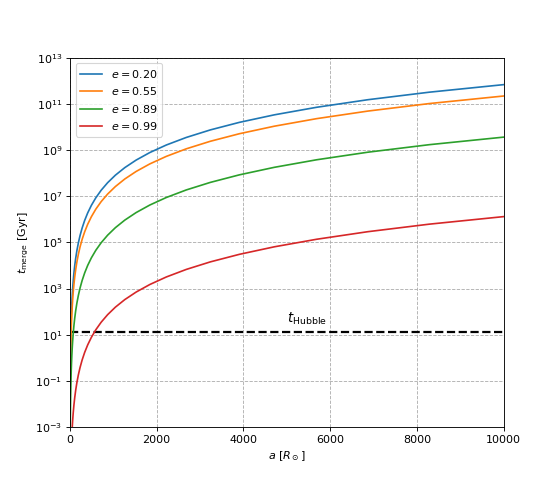

interactive(children=(FloatSlider(value=0.2, continuous_update=False, description='e', max=0.99, step=0.01), O…

In [23]:
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets

%matplotlib notebook

fig, ax = plt.subplots(figsize=(7,6))

ax.text(5000,50, r"$t_\mathrm{Hubble}$", fontsize=12.0, va="center")
ax.axhline(y=13.461701658024014e0, color="black", linestyle="--", linewidth=2)

interact(do_plot,
         m1=fixed(12),
         m2=fixed(8),
         a=fixed(np.logspace(0,4,50)),
         e=FloatSlider(min=0, max=0.99, step=0.01, value=0.2, continuous_update=False),
         ax=fixed(ax));